In [1]:
import torch
import sys

sys.path.append('..')

import SourceCode

In [2]:
from math import pi, e
import matplotlib.pyplot as plt
import torch
from SourceCode.utilities import nth_derivative, plot_two_1d_functions
from SourceCode.EquationClass import MainEquationClass
from SourceCode.DomainClass import OneDimensionalSimpleDomain
from SourceCode.InitConditionClass import OnePointInitialCondition
from SourceCode.TrainerForNNEquationSolver import TrainerForNNEquationSolver
from SourceCode.ReportMaker import ReportMaker
import time
dh = 1e-3


n_epochs = 10
n_points = 10

# Example №1
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5}) cos(t) $$
$$ u(0)=0 $$
$$ u(1)= sin(1)*exp(-0.2) $$
$$ t \in [0,1] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [3]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

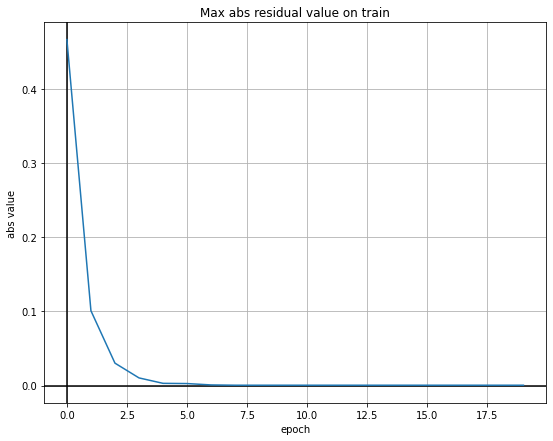

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 2.2969208657741547e-05
Valid max absolute error |Appr(x)-y(x)|: 2.2324733436107635e-05
MAPE on train data: 0.0026382038413430564 %
MAPE on validation data: 0.0025418741643079557 %
Max abs value of residual on train at last epoch: 0.0003765523433685303 


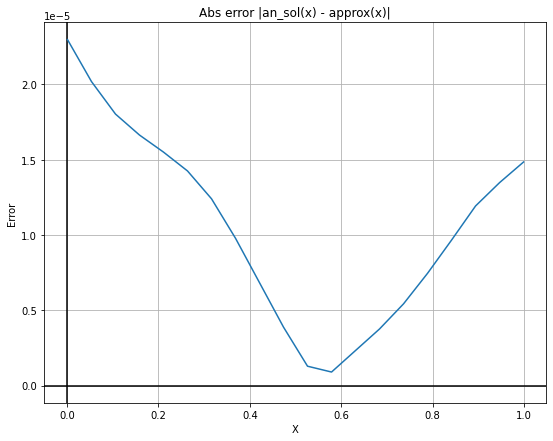

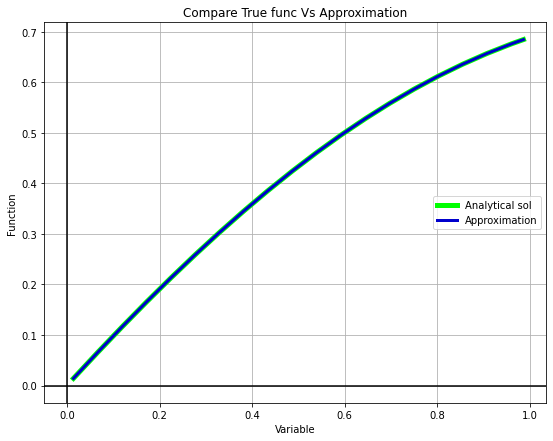

In [4]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

lets try to solve the same problem but on a smaller domain $x \in [0, 0.1]$

In [5]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
    + 0.2 * nth_derivative(nn_model(x), x, 1)
    + nn_model(x)
    + 0.2 * torch.exp(-x / 5) * torch.cos(x)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - torch.sin(
    torch.Tensor([1])
) * torch.exp(torch.Tensor([-0.2]))
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

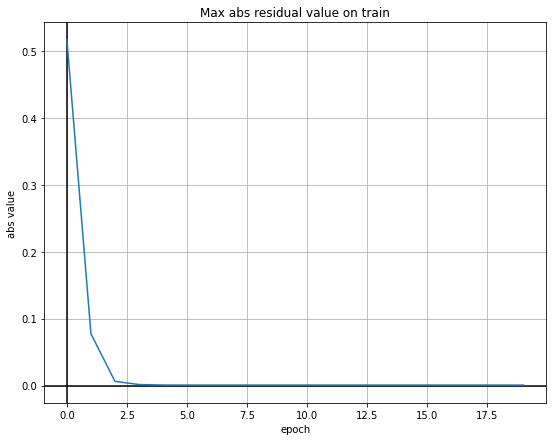

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0029251500964164734
Valid max absolute error |Appr(x)-y(x)|: 0.002888016402721405
MAPE on train data: 3.0174903571605682 %
MAPE on validation data: 3.0159102752804756 %
Max abs value of residual on train at last epoch: 0.0006247758865356445 


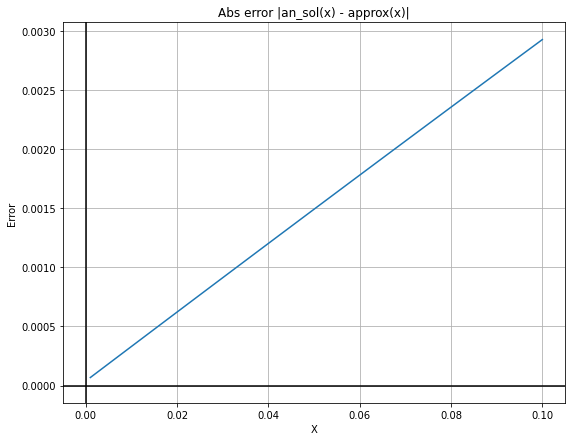

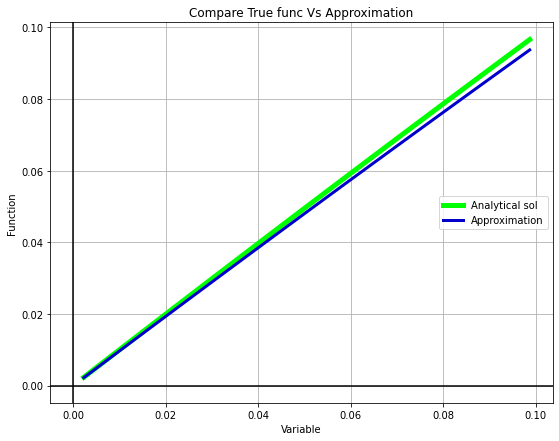

In [6]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

it is strange but descpite my expectations here on a smaller domain NN function performs worse

# Example №2
$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,2] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [7]:
left_bound = 0
right_bound = 2
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)


n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

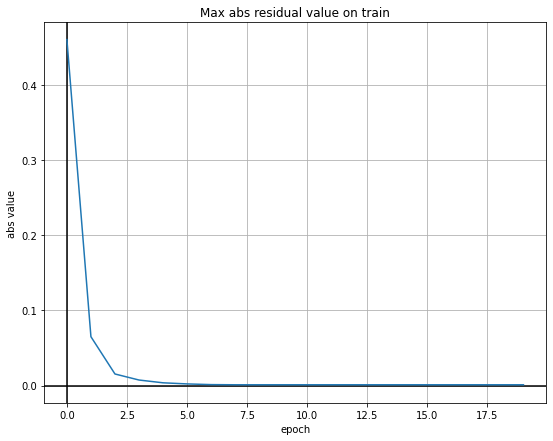

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 6.99758529663086e-05
Valid max absolute error |Appr(x)-y(x)|: 6.92605972290039e-05
MAPE on train data: 0.006740473327226937 %
MAPE on validation data: 0.006704537372570485 %
Max abs value of residual on train at last epoch: 0.000956222414970398 


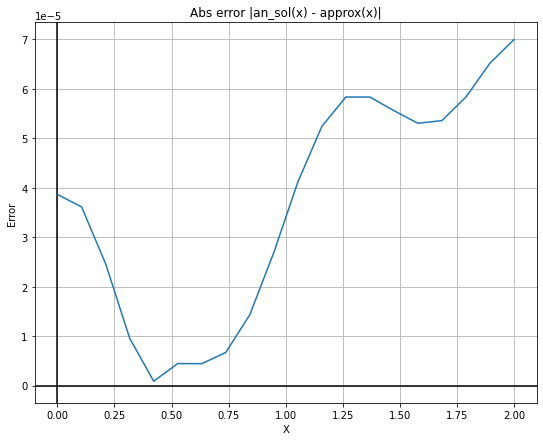

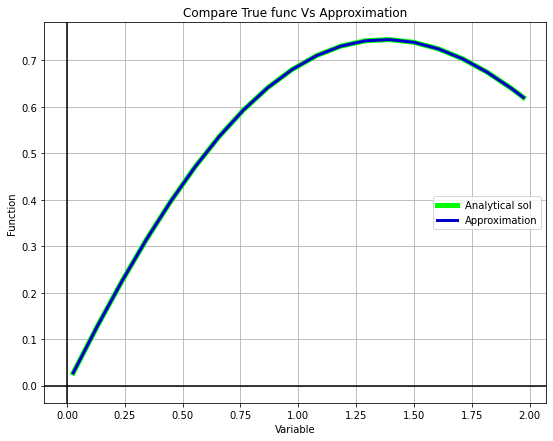

In [8]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [9]:
data = torch.linspace(0,10,100)
data = data.view(-1,1)

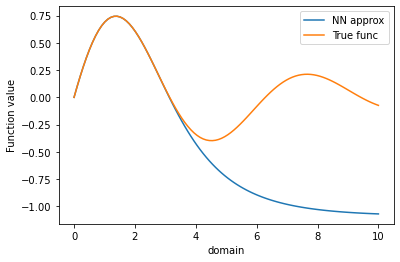

In [10]:
plt.plot(data, nn_model[0](data).detach().numpy(), label='NN approx')
plt.plot(data, analytical_solution(data).detach().numpy(), label='True func')
plt.xlabel("domain")
plt.ylabel("Function value")
plt.legend()

hmm, apparently neural networks are not good at extrapolation of an unknown function

$$ u_{tt} + 0.2u_t + u = -0.2 exp(-\frac{t}{5})cos(t) $$
$$ u(0)=0 $$
$$ u'(0)=1 $$
$$ t \in [0,10] $$
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

lets try to solve the same problem but with a bigger domain, $t \in [0,10]$

In [11]:
left_bound = 0
right_bound = 10
main_eq_residual = (
        lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
        + 0.2 * nth_derivative(nn_model(x), x, 1)
        + nn_model(x)
        + 0.2 * torch.exp(-x / 5) * torch.cos(x)
    )
n_points = 100

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)


first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 1
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

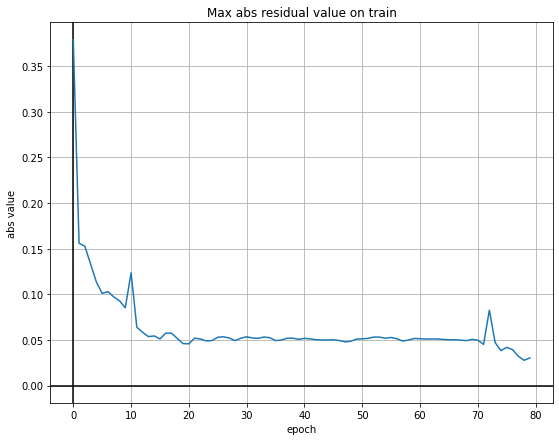

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.01627088338136673
Valid max absolute error |Appr(x)-y(x)|: 0.016300193965435028
MAPE on train data: 2.1458545699715614 %
MAPE on validation data: 2.155197225511074 %
Max abs value of residual on train at last epoch: 0.030212312936782837 


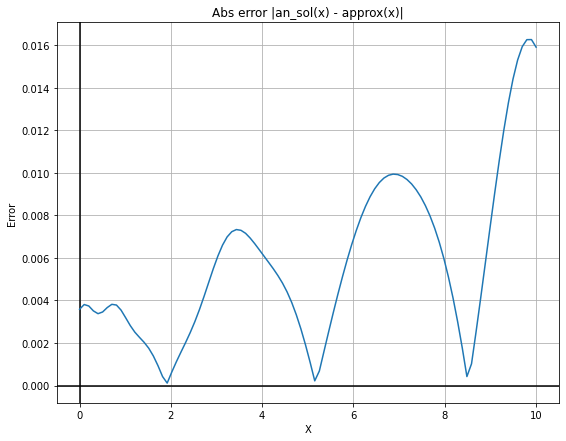

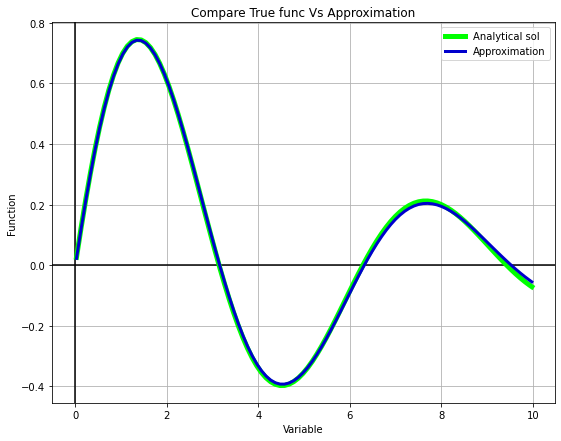

In [12]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

as you can see if domain is big then NN cannot approximate unknown function on a big domain properly

# Example №3
$$ u' + 0.2u = exp(- \frac{t}{5})cos(t) $$
$$ u(0) = 0 $$
$$ t \in [0,20] $$ 
$$ true\_solution = exp(-\frac{t}{5})*sin(t) $$

In [13]:
left_bound = 0
right_bound = 20
main_eq_residual = (
    lambda variable, function: nth_derivative(function(variable), variable, 1)
    + 0.2 * function(variable)
    -  torch.exp(-variable / 5) * torch.cos(variable)
)
n_points = 40

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(0, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)
n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

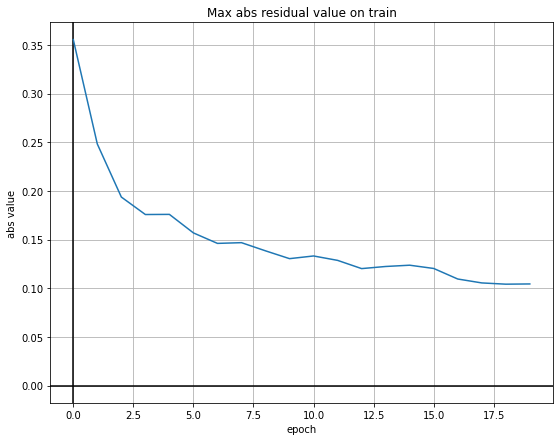

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.5282027721405029
Valid max absolute error |Appr(x)-y(x)|: 0.48678457736968994
MAPE on train data: 87.80006170272827 %
MAPE on validation data: 87.31012344360352 %
Max abs value of residual on train at last epoch: 0.10434229671955109 


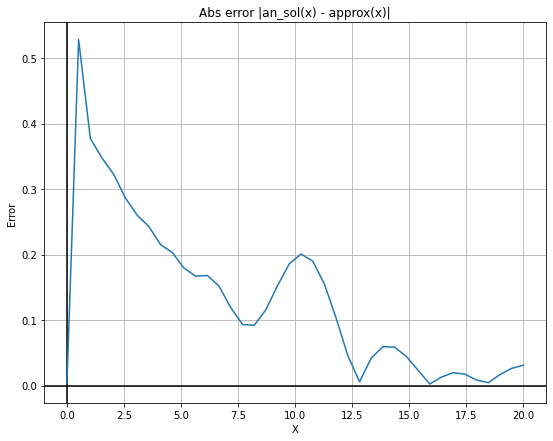

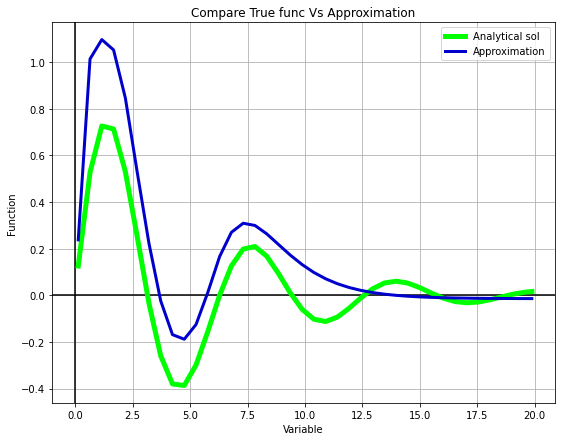

In [14]:
analytical_solution = lambda x: torch.exp(-x / 5) * torch.sin(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №4
$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,2] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

In [15]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True) * variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

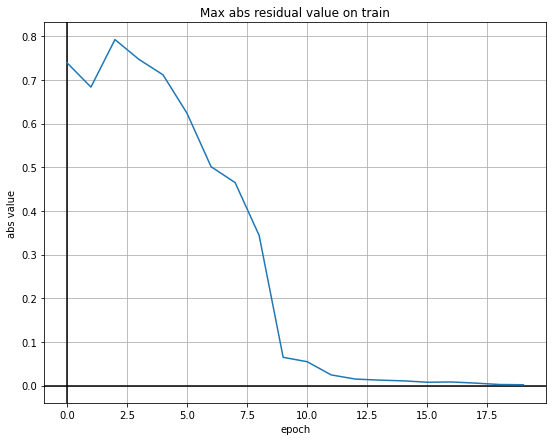

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00011488795280456543
Valid max absolute error |Appr(x)-y(x)|: 0.00011602044105529785
MAPE on train data: 0.009965748176909983 %
MAPE on validation data: 0.010050584387499839 %
Max abs value of residual on train at last epoch: 0.0017240643501281738 


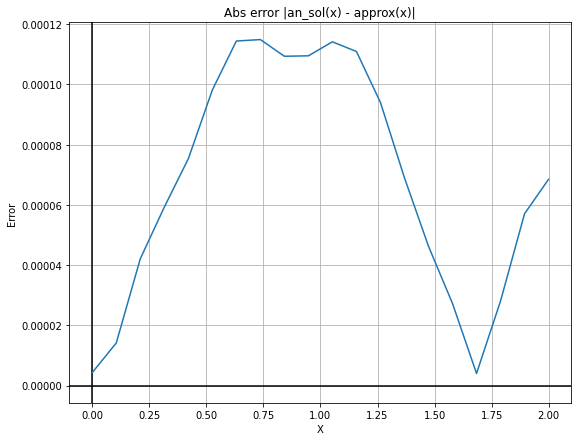

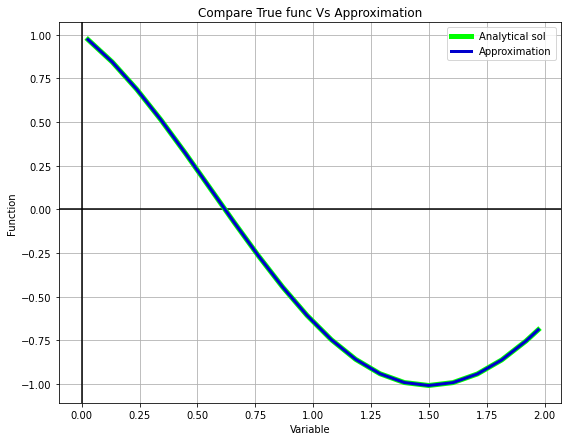

In [16]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

$$ u''+4u=cos(2t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ t \in [0,10] $$ 
$$ true\_solution = \frac{1}{4}*t * sin(2*t) + cos(2*t) - \frac{1}{2}sin(2*t) $$

Again, if we expand domain we will see that there is no convergence. But we can resolve this issue by adding extra points to domain

In [17]:
left_bound = 0
right_bound = 5
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + torch.tensor([4.0],requires_grad=True) * function(variable)
    - torch.cos(torch.tensor([2.0],requires_grad=True)*variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

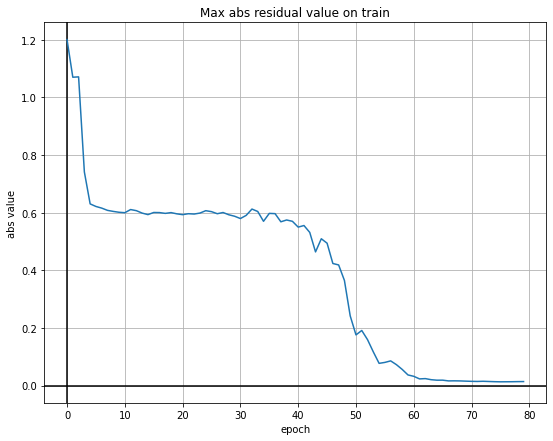

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.004350900650024414
Valid max absolute error |Appr(x)-y(x)|: 0.004356980323791504
MAPE on train data: 0.42160702869296074 %
MAPE on validation data: 0.42087300680577755 %
Max abs value of residual on train at last epoch: 0.013672322034835815 


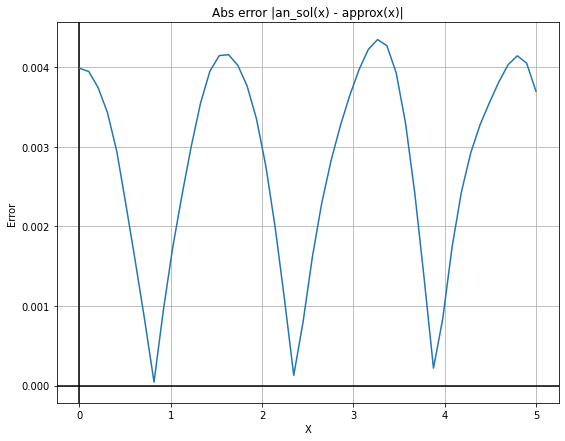

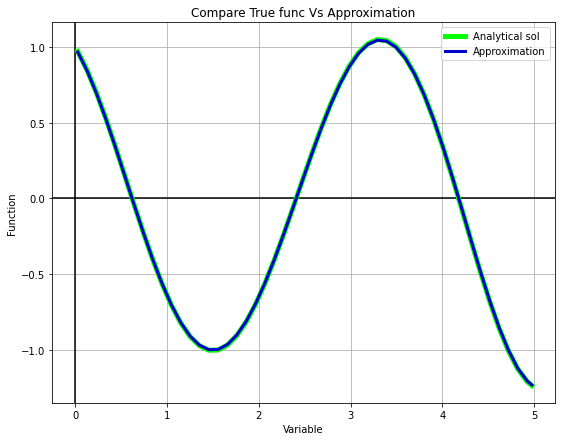

In [18]:
analytical_solution = lambda x: 1/4 * x * torch.sin(2*x) + torch.cos(2*x) - 1/2 * torch.sin(2*x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №5
$$ u''' - 3u'' + 3u' -u = exp(t) $$
$$ u(0)=1 $$
$$ u'(0)=-1 $$
$$ u''(0)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = \frac{1}{6} * exp(t) * (t^3 + 12*t^2-12*t+6) $$

In [11]:
left_bound = 0
right_bound = 2
main_eq_residual = (
    lambda variable, function: 
      nth_derivative(function(variable), variable, 3)
    - torch.tensor([3.0]) * nth_derivative(function(variable), variable, 2)
    + torch.tensor([3.0]) * nth_derivative(function(variable), variable, 1)
    - function(variable)
    - torch.exp(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) + torch.tensor([1.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2) - torch.tensor([1.0],requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 50
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

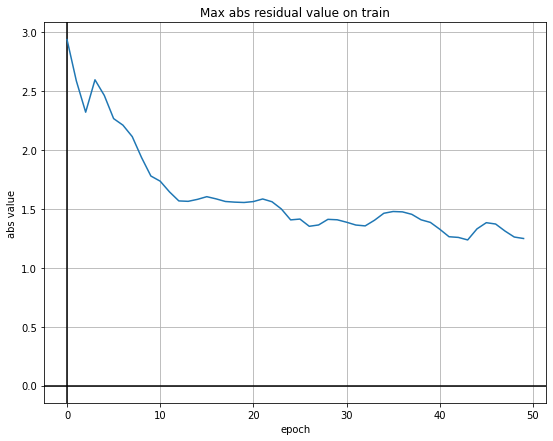

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 39.61539077758789
Valid max absolute error |Appr(x)-y(x)|: 35.245826721191406
MAPE on train data: 84.98108983039856 %
MAPE on validation data: 84.84848737716675 %
Max abs value of residual on train at last epoch: 1.2483270168304443 


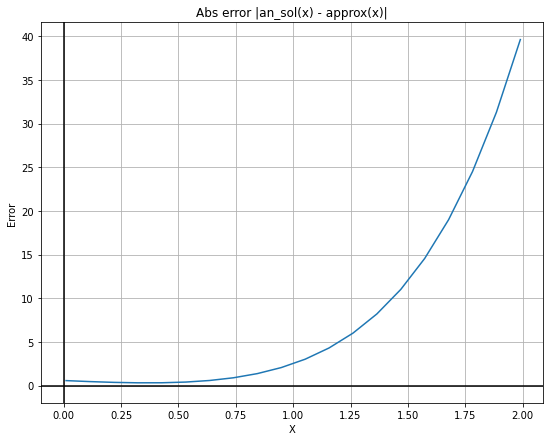

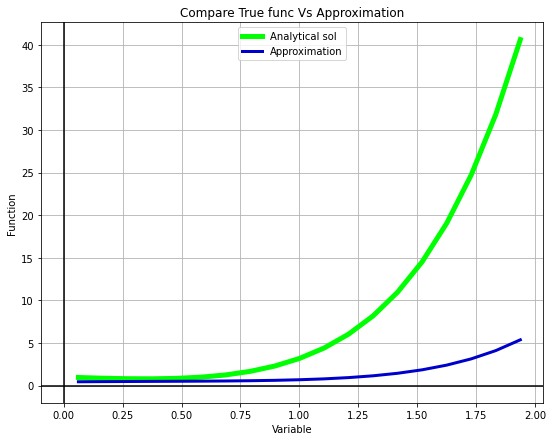

In [12]:
analytical_solution = lambda x: torch.exp(x) * 1/6 * (x*x*x + 12*x*x- 12*x + 6)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = -t $$
$$ u(0)=0 $$
$$ t \in [0,1] $$
$$ true\_solution = \frac{sin(x)}{sin(1)} - t $$

In [21]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    + variable
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([0.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - 0
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 80
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

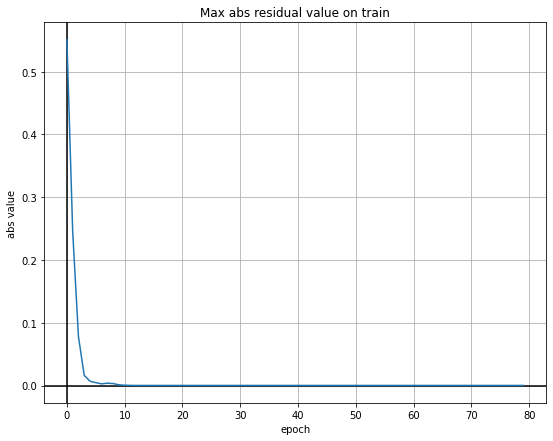

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 3.981555346399546e-05
Valid max absolute error |Appr(x)-y(x)|: 3.9828941226005554e-05
MAPE on train data: 0.06652080919593573 %
MAPE on validation data: 0.06532167317345738 %
Max abs value of residual on train at last epoch: 8.744001388549805e-05 


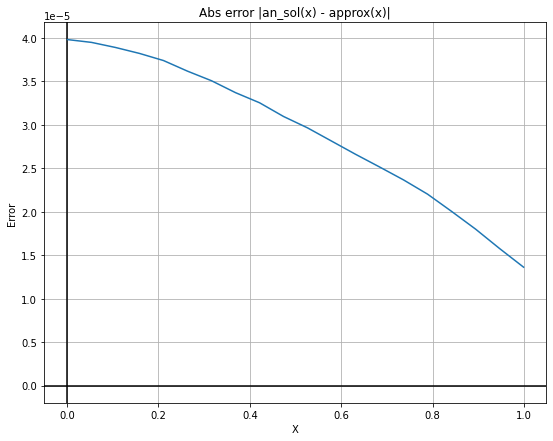

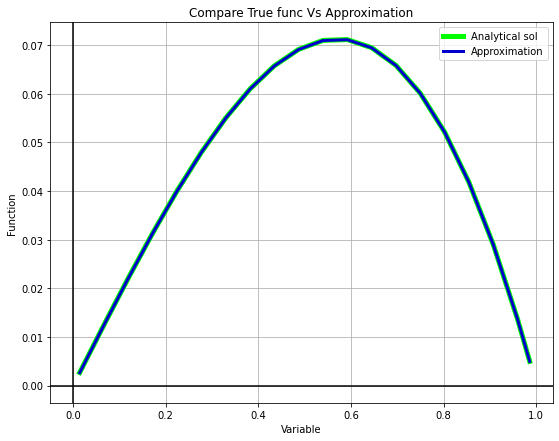

In [22]:
analytical_solution = lambda x: torch.sin(x)/torch.sin(torch.Tensor([1])) - x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №6
$$ u'' + u = 1 $$
$$ u'(0)=0 $$
$$ u(\frac{\pi}{2})-u'(\frac{\pi}{2})= 2 $$
$$ t \in [0,1] $$
$$ true\_solution = 1 + cos(t) $$

In [23]:
left_bound = 0
right_bound = pi/2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 2)
    + function(variable)
    - 1
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x) - nth_derivative(nn_model(x), x, 1) - 2
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

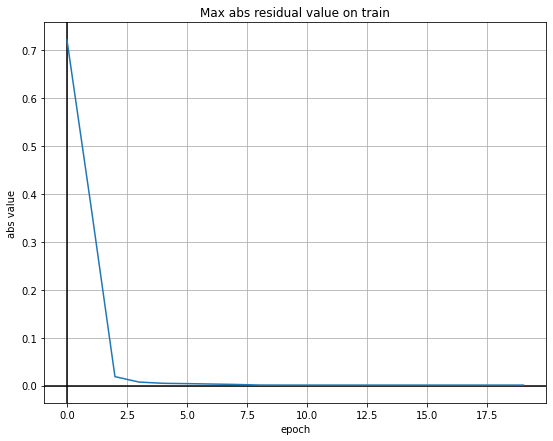

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 3.886222839355469e-05
Valid max absolute error |Appr(x)-y(x)|: 3.8504600524902344e-05
MAPE on train data: 0.0018441342035657726 %
MAPE on validation data: 0.0018571106920717284 %
Max abs value of residual on train at last epoch: 0.0008752942085266113 


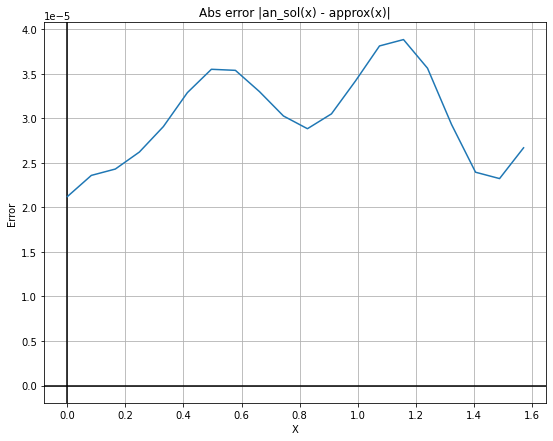

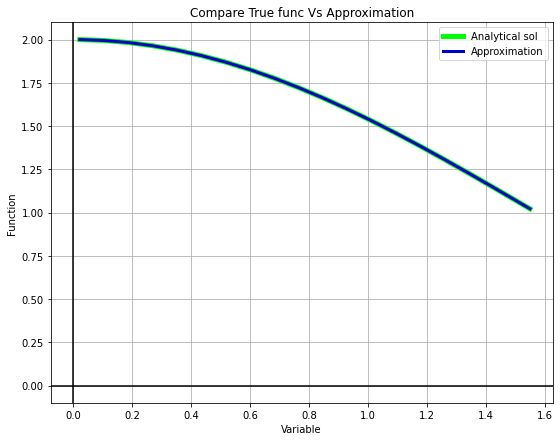

In [24]:
analytical_solution = lambda x: torch.Tensor([1]) + torch.cos(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №7
$$ u'' - u = 4exp(t) $$
$$ u(0)=0 $$
$$ u'(o)=1 $$
$$ t \in [0,1] $$ 
$$ true\_solution = 2t*exp(t) - sinh(t) $$

In [40]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: nth_derivative(function(variable), variable, 2)
    - function(variable)
    - torch.tensor([4.0],requires_grad=True) * torch.exp(variable)
)
n_points = 20
analytical_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - 0
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([1.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 40
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

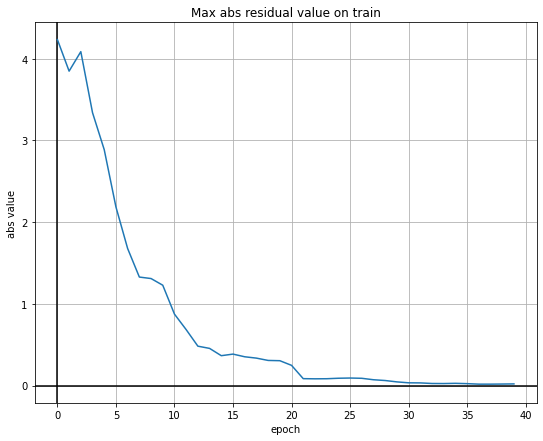

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.00293731689453125
Valid max absolute error |Appr(x)-y(x)|: 0.0042231082916259766
MAPE on train data: 0.09890878573060036 %
MAPE on validation data: 0.10559479705989361 %
Max abs value of residual on train at last epoch: 0.01960277557373047 


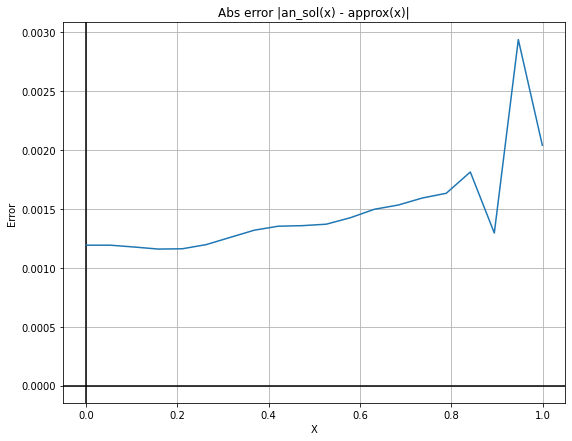

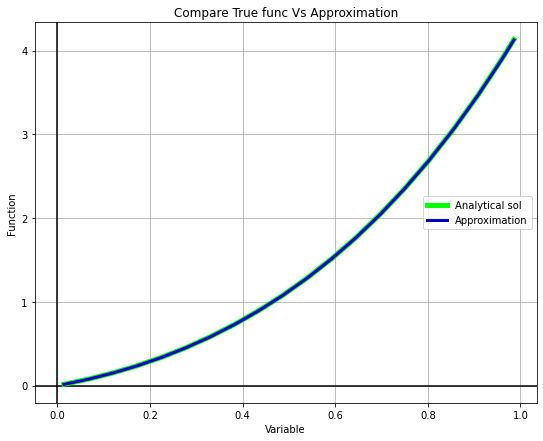

In [41]:
analytical_solution = lambda x: 2 * x * torch.exp(x) - torch.sinh(x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №8
$$ (1+t^2)u''-2tu = 0 $$
$$ u(0)=0 $$
$$ u'(0)=3 $$
$$ t \in [0,1] $$
$$ true\_solution = t^3 + 3*t $$

In [27]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: (torch.tensor([1.0],requires_grad=True) + variable*variable)
    * nth_derivative(function(variable), variable, 2)
    - 2 * variable * function(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([3.0], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

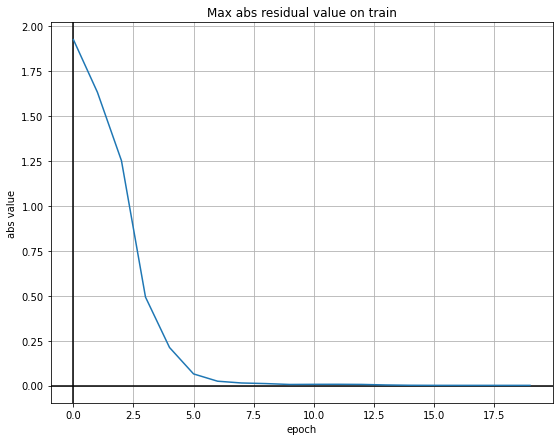

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.034183502197265625
Valid max absolute error |Appr(x)-y(x)|: 0.029570341110229492
MAPE on train data: 0.22989355493336916 %
MAPE on validation data: 0.2311027841642499 %
Max abs value of residual on train at last epoch: 0.0007843971252441406 


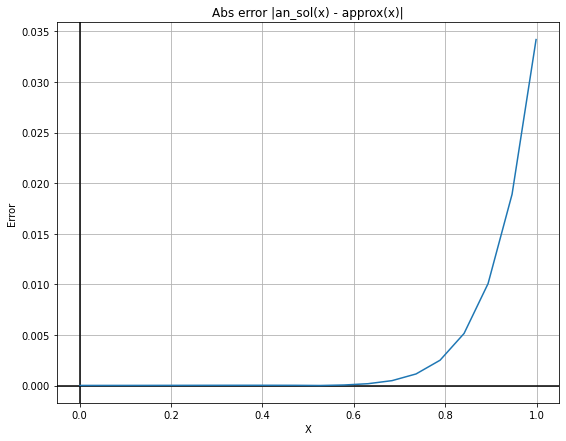

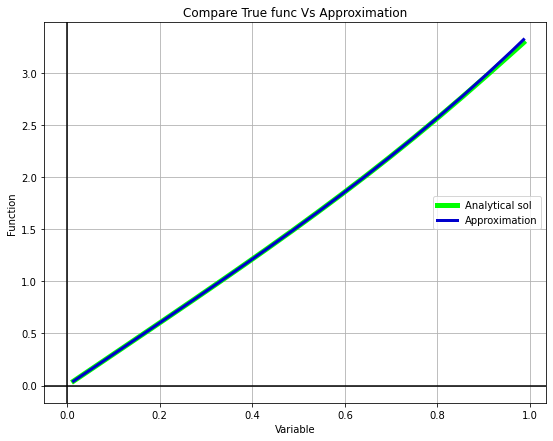

In [28]:
analytical_solution = lambda x: (3*x + pow(x,4)/2 - pow(x,6)/5 + pow(x,7)/42 + 
                           3*pow(x,8)/28 - 7*pow(x,9)/360 - 25*pow(x,10)/378)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №9
$$ u'''+ u'' = \frac{t-1}{t^2} $$
$$ u(1) = \frac{1+e}{e} $$
$$ u'(1) = -\frac{1+e}{e} $$
$$ u''(1) = \frac{1-e}{e} $$
$$ t \in [1,2] $$
$$ true\_sol =  -4t + tln(t) + 7 - 2exp(1-t) + exp(-t) $$

In [29]:
left_bound = 1
right_bound = 2
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 3)
    + nth_derivative(function(variable), variable, 2)
    - (variable-1)/(variable**2)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - (1+e)/e
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,1) + torch.tensor([(1+e)/e], requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,2) - torch.tensor([(1-e)/e], requires_grad=True)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]

main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

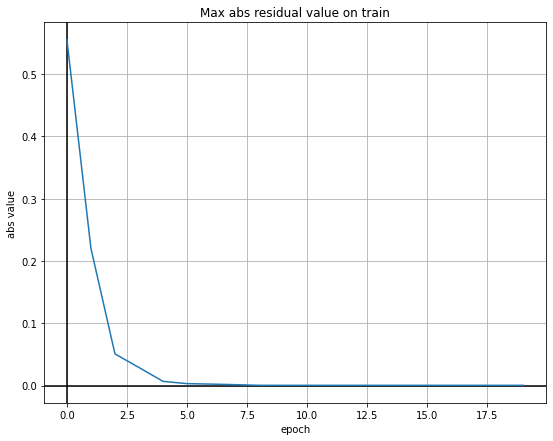

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 9.825825691223145e-05
Valid max absolute error |Appr(x)-y(x)|: 9.69618558883667e-05
MAPE on train data: 0.008679537859279662 %
MAPE on validation data: 0.009049967775354162 %
Max abs value of residual on train at last epoch: 0.00028824806213378906 


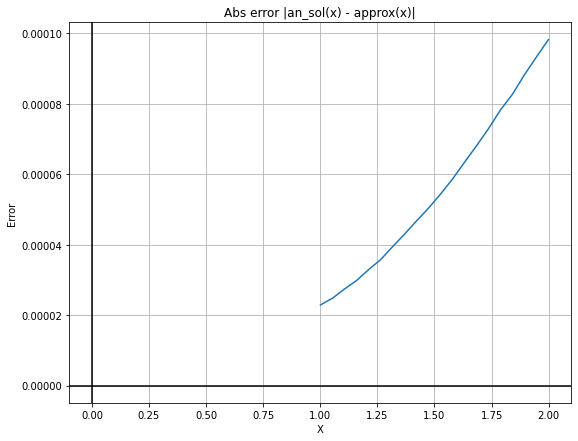

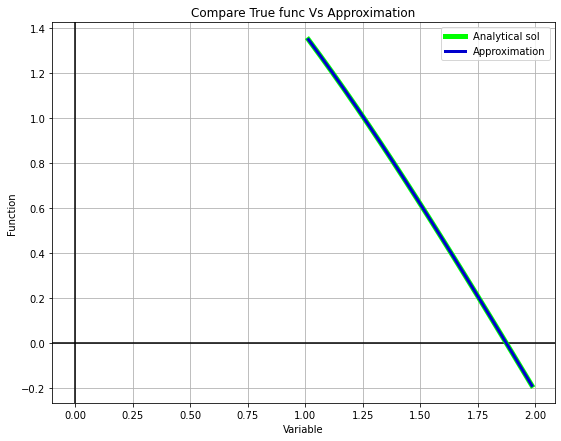

In [30]:
analytical_solution = lambda x: -x*4 + x * torch.log(x) + 7 - 2 * torch.exp(1-x) + torch.exp(-x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №10
$$ u''''+ u'' = \frac{1 + sin^2(t)}{cos^3(t)} $$
$$ u(0) = 1 $$
$$ u'(0) = 0  $$
$$ u''(0) = 0 $$
$$ u'''(0) = 0 $$
$$ t \in [0, 1] $$ 
$$ true\_sol =  (1 + ln(cos(t)))*cos(t) + t * sin(t) $$

In [68]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 4)
    + nth_derivative(function(variable), variable, 2)
    - (torch.tensor([1.0],requires_grad=True) + torch.sin(variable)*torch.sin(variable))
    /(torch.cos(variable)*torch.cos(variable)*torch.cos(variable))
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0],requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

fourth_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 3)
fourth_init_cond = OnePointInitialCondition(left_bound, fourth_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond, fourth_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions, bound_coefficient=10)

n_epochs = 40
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs, lr=0.5)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

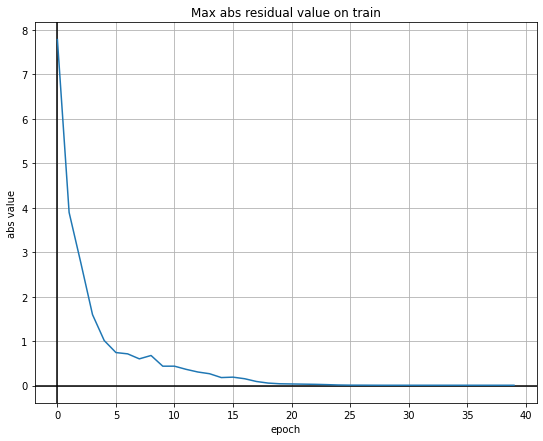

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.0016951560974121094
Valid max absolute error |Appr(x)-y(x)|: 0.0016732215881347656
MAPE on train data: 0.08561242721043527 %
MAPE on validation data: 0.08738492615520954 %
Max abs value of residual on train at last epoch: 0.005637645721435547 


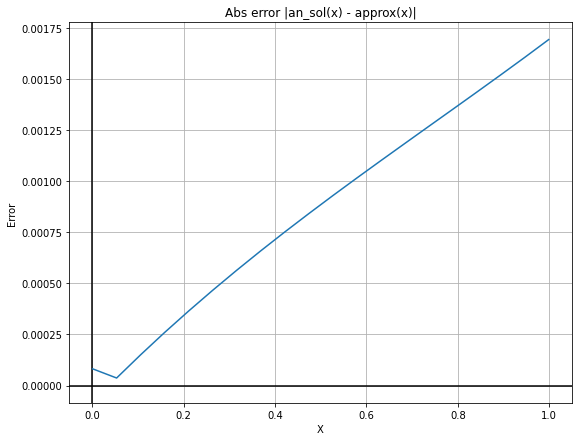

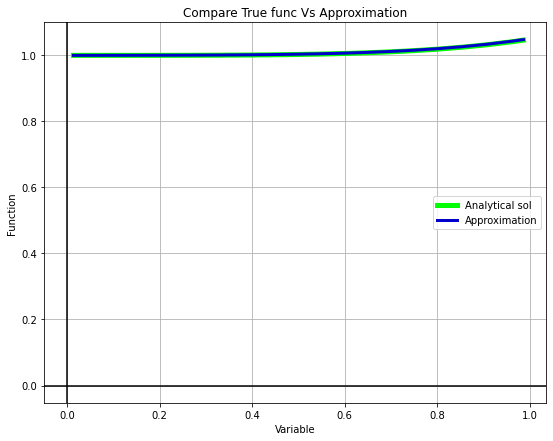

In [69]:
analytical_solution = lambda x: ((torch.tensor([1.0],requires_grad=True) + torch.log(torch.cos(x))) 
                           * torch.cos(x) + x * torch.sin(x))
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №11
$$ u'''+ u' = t*sin(t) + 3*cos(t) $$
$$ u(0) = 1 $$
$$ u'(0) = 2  $$
$$ u''(0) = 0 $$
$$ t \in [0, 1] $$
$$ true\_sol =  1/4 * (-(t^2 - 17) * sin(t) - 9 * t * cos(t) + 4) $$

In [33]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 3)
    + nth_derivative(function(variable), variable, 1)
    - variable * torch.sin(variable) - 3 * torch.cos(variable)
)
n_points = 20

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x) - torch.tensor([1.0], requires_grad=True)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x), x, 1) - torch.tensor([2.0],requires_grad=True)
second_init_cond = OnePointInitialCondition(left_bound, second_init_cond_res)

third_init_cond_res = lambda x, nn_model: nth_derivative(nn_model(x),x,2)
third_init_cond = OnePointInitialCondition(left_bound, third_init_cond_res)

boundary_conditions = [first_init_cond, second_init_cond, third_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

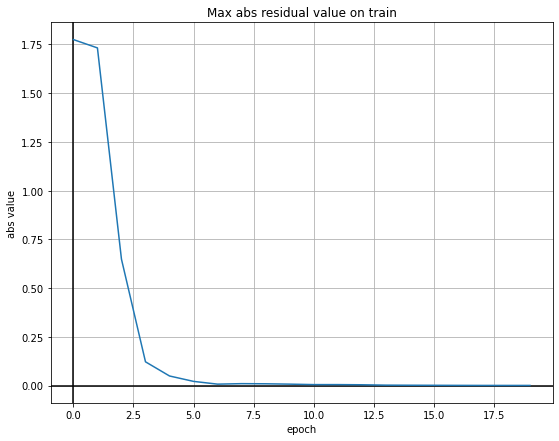

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 4.696846008300781e-05
Valid max absolute error |Appr(x)-y(x)|: 4.649162292480469e-05
MAPE on train data: 0.0012039301509503275 %
MAPE on validation data: 0.0012074584446963854 %
Max abs value of residual on train at last epoch: 0.00037598609924316406 


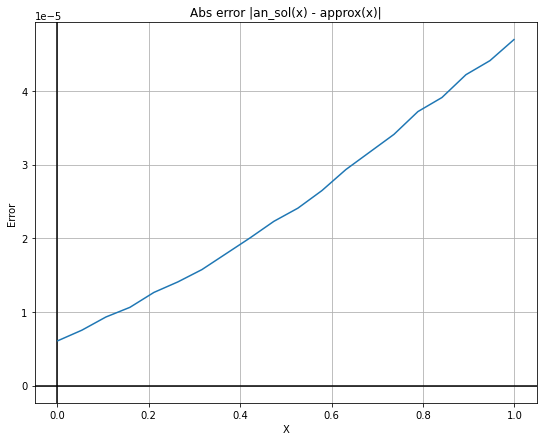

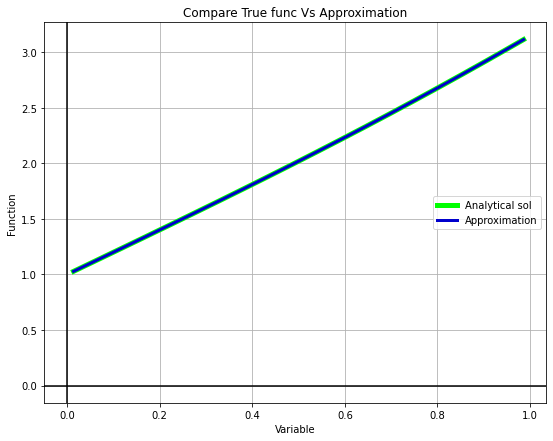

In [34]:
analytical_solution = lambda x: 1/4*(-(x**2-17)*torch.sin(x)-9*x*torch.cos(x)+4)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №12. A physical problem 

A rubber cord with a length of **1** meter is extended by **kf** meters under the action of a force **f** kg. 

By how much will the same cord of length **l** and weight **m** be extended under the action of its own weight, if it is hung at one end?

$$ u'= \frac{km}{l}(l-x) $$
$$ u(0) = 0 $$
$$ x \in [0, l] $$
$$ true\_sol =  \frac{km}{2l}*(l-x)x $$

Lets assume that $l = 3$ meters, $m = 5$ kg, $k = 2\frac{Newton}{meter}$

In [35]:
l = 10
m = 5
k = 2
left_bound = 0
right_bound = l
main_eq_residual = (
    lambda variable, function,: nth_derivative(function(variable), variable, 1)
    - k*m/l*(l-variable)
)
n_points = 50

main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)
first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

boundary_conditions = [first_init_cond]


main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()

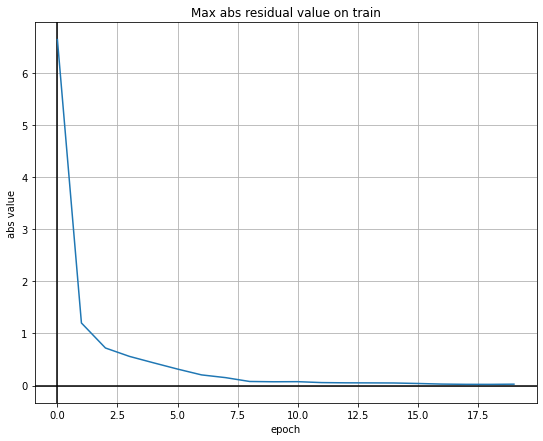

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 0.22499918937683105
Valid max absolute error |Appr(x)-y(x)|: 0.2031402587890625
MAPE on train data: 0.40398044511675835 %
MAPE on validation data: 0.40256576612591743 %
Max abs value of residual on train at last epoch: 0.02567577362060547 


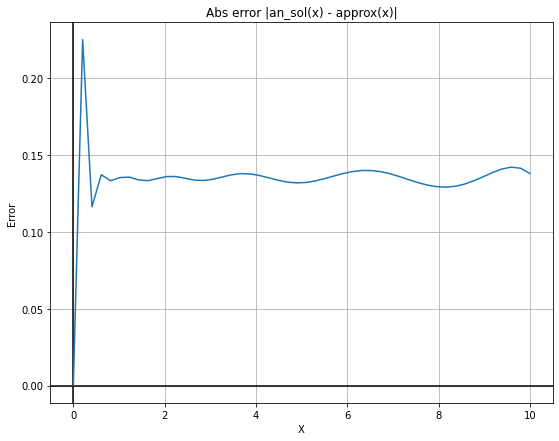

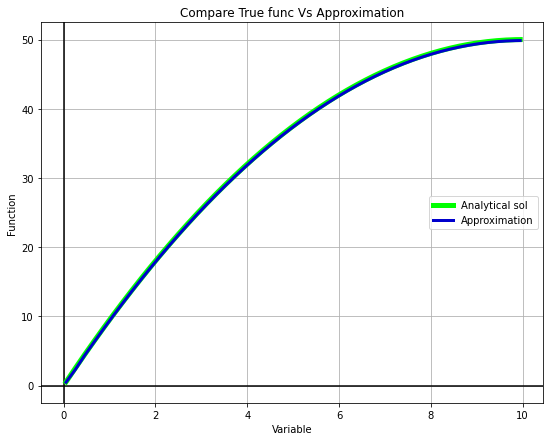

In [36]:
analytical_solution = lambda x: k*m/(2*l)*(2*l-x)*x
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

# Example №13
$$ y''+ xy' + \sqrt{x}T_x^{0.5} - 2y= -6x-4x^3 <=> y''+ 2xy' - 2y= -6x-4x^3$$
$$ y(0) = 0 $$
$$ y(1) = 0  $$
$$ x \in [0, 1] $$
$$ true\_sol =  x^2 - x^3 $$

In [37]:
left_bound = 0
right_bound = 1
main_eq_residual = (
    lambda variable, function: 
    nth_derivative(function(variable), variable, 2)
    + 2 * variable * nth_derivative(function(variable), variable, 1)
    - 2 * function(variable)
    + 6 * variable + 4 * torch.pow(variable, 3)
)
n_points = 20
analytical_solution = lambda x: x * (1 - x * x)
main_domain = OneDimensionalSimpleDomain(left_bound, right_bound, n_points)

first_init_cond_res = lambda x, nn_model: nn_model(x)
first_init_cond = OnePointInitialCondition(left_bound, first_init_cond_res)

second_init_cond_res = lambda x, nn_model: nn_model(x)
second_init_cond = OnePointInitialCondition(right_bound, second_init_cond_res)
boundary_conditions = [first_init_cond, second_init_cond]


start_time = time.time()
main_eq = MainEquationClass(main_domain, main_eq_residual, boundary_conditions)

n_epochs = 20
nn_ode_solver = TrainerForNNEquationSolver(main_eq, n_epochs)
loss_train, loss_valid, nn_model = nn_ode_solver.fit()
print("--- %s seconds ---" % (time.time() - start_time))

--- 8.399401903152466 seconds ---


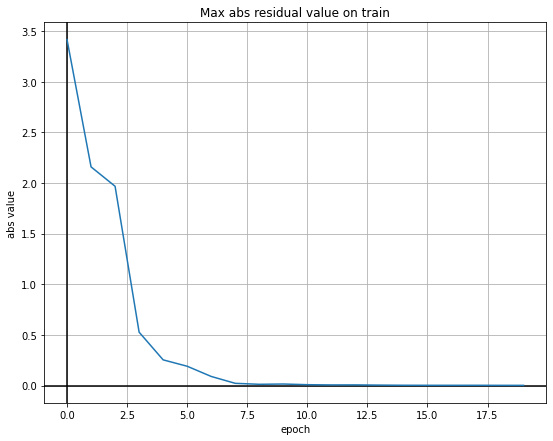

Comparison of approximation and analytical solution:
Train max absolute error |Appr(x)-y(x)|: 4.9564288929104805e-05
Valid max absolute error |Appr(x)-y(x)|: 4.7923997044563293e-05
MAPE on train data: 0.013241925626061857 %
MAPE on validation data: 0.012985372450202703 %
Max abs value of residual on train at last epoch: 0.0014394568279385567 


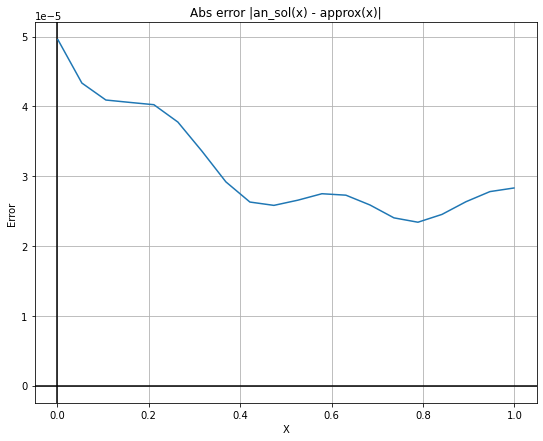

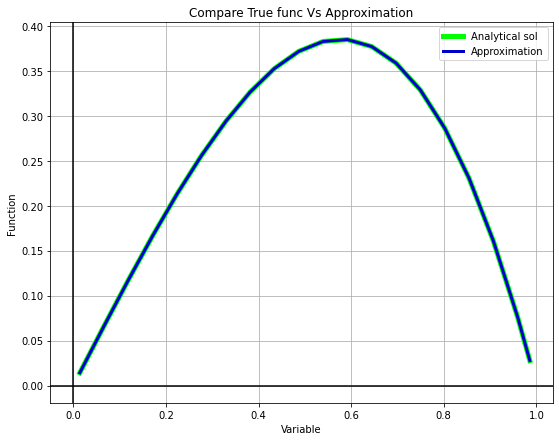

In [38]:
analytical_solution = lambda x: x * (1 - x * x)
report = ReportMaker(nn_model,
                         loss_train,
                         loss_valid,
                         main_domain,
                         compare_to_functions=plot_two_1d_functions,
                         analytical_solutions=analytical_solution
                         )
report.print_loss_history()
report.compare_appr_with_analytical()

In [39]:
report.print_comparison_table()

train data
     Input_X  Analytical_F     ANN_F  Abs error
0   0.001000      0.001000  0.001050   0.000050
1   0.053526      0.053373  0.053416   0.000043
2   0.106053      0.104860  0.104901   0.000041
3   0.158579      0.154591  0.154632   0.000041
4   0.211105      0.201697  0.201738   0.000040
5   0.263632      0.245309  0.245347   0.000038
6   0.316158      0.284556  0.284590   0.000034
7   0.368684      0.318570  0.318599   0.000029
8   0.421211      0.346480  0.346506   0.000026
9   0.473737      0.367418  0.367444   0.000026
10  0.526263      0.380513  0.380540   0.000027
11  0.578789      0.384897  0.384924   0.000027
12  0.631316      0.379699  0.379726   0.000027
13  0.683842      0.364050  0.364076   0.000026
14  0.736368      0.337081  0.337105   0.000024
15  0.788895      0.297922  0.297946   0.000023
16  0.841421      0.245704  0.245728   0.000025
17  0.893947      0.179557  0.179583   0.000026
18  0.946474      0.098611  0.098639   0.000028
19  0.999000      0.001997  0